# Exercise 4: Exact Diagonalization

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Part a

In [2]:
Id = scipy.sparse.csr_matrix(np.eye(2))
sigmax = scipy.sparse.csr_matrix(np.array([[0,1],[1,0]]))
sigmay = scipy.sparse.csr_matrix(np.array([[0,-1j],[1j,0]]))
sigmaz = scipy.sparse.csr_matrix(np.array([[1,0],[0,-1]]))


### Part b

In [3]:
"""
Function that returns for given L a list, which contains
a representation of σz j (in the form of a csr_matrix) as 
jth entry of the list

"""

def sigmaz_j(L,j):
    if j == 1:
        full = scipy.sparse.kron(sigmaz , Id , format = 'csr' )
    elif j == 2:
        full = scipy.sparse.kron(Id , sigmaz, format = 'csr' )
    else:
        full = scipy.sparse.kron(Id , Id , format = 'csr' )
    for i in range(3,L+1):
        if i==j:
            full = scipy.sparse.kron(full , sigmaz , format = 'csr' )
        else:
            full = scipy.sparse.kron(full , Id , format = 'csr' )        
    return full

In [4]:
def sz_list(L):
    result = []
    for j in range (1,L+1):
        result.append(sigmaz_j(L,j))
    result.append(sigmaz_j(L,1))
    return result

### Part c

In [5]:
#Same for sigmax_j
def sigmax_j(L,j):
    if j == 1:
        full = scipy.sparse.kron(sigmax , Id , format = 'csr' )
    elif j == 2:
        full = scipy.sparse.kron(Id , sigmax, format = 'csr' )
    else:
        full = scipy.sparse.kron(Id , Id , format = 'csr' )
    for i in range(3,L+1):
        if i==j:
            full = scipy.sparse.kron(full , sigmax , format = 'csr' )
        else:
            full = scipy.sparse.kron(full , Id , format = 'csr' )        
    return full

In [14]:
def sx_list(L):
    result = []
    for j in range (1,L+1):
        result.append(sigmax_j(L,j))
    result.append(sigmax_j(L,1))
    return result

### Part d

In [15]:
def gen_hamiltonian(sx_list,sz_list, g, J):
    H = 0
    for i in range(len(sx_list)-1):
        H1 = -J*(sx_list[i]*sx_list[i+1]) - g*sz_list[i]  
        H = H + H1
    return H

In [37]:

H_2 = gen_hamiltonian(sx_list(2), sz_list(2), 0.1,1)

H_array = H_2.toarray()

print(H_array)

[[-0.2  0.   0.  -2. ]
 [ 0.   0.  -2.   0. ]
 [ 0.  -2.   0.   0. ]
 [-2.   0.   0.   0.2]]


### Part e

In [17]:
eigenvalues_example ,eigenstates_example = scipy.sparse.linalg.eigsh(gen_hamiltonian(sx_list(2), sz_list(2), 0.1,1), k = 3, which = 'SA', return_eigenvectors=True )

print("eigenvalues: ", eigenvalues_example)
print()
print("eigenstates: ", eigenstates_example)

eigenvalues:  [-2.00997512 -2.          2.        ]

eigenstates:  [[-7.41452534e-01 -3.83026943e-15 -1.15463195e-14]
 [-3.38618023e-15  7.07106781e-01 -7.07106781e-01]
 [-3.60822483e-15  7.07106781e-01  7.07106781e-01]
 [-6.71005321e-01 -3.05311332e-15  1.23789867e-14]]


In [18]:
import time

In [19]:
H_12 = gen_hamiltonian(sx_list(12), sz_list(12), 0.1,1)
H_12_array = H_12.toarray()

time1_eigsh = time.time()
eigenvalues_12_eigsh ,eigenstates_12_eigsh = scipy.sparse.linalg.eigsh(H_12, k = 3, which = 'SA', return_eigenvectors=True )
time2_eigsh = time.time()
deltatime_eigsh = time2_eigsh - time1_eigsh

time1_linalg = time.time()
eigenvalues_12_linalg ,eigenstates_12_linalg = np.linalg.eigh(H_12_array)
time2_linalg = time.time()
deltatime_linalg = time2_linalg - time1_linalg

print(f"Elapsed eigsh time: {deltatime_eigsh:.3f} seconds")
print(f"Elapsed linalg time: {deltatime_linalg:.3f} seconds")

Elapsed eigsh time: 0.217 seconds
Elapsed linalg time: 43.647 seconds


In [85]:
print(np.shape(eigenstates_12_eigsh))

(4096, 3)


### Part f

In [64]:
L = 12
N_steps = 15 
eigstates_ground = []
eigvalues_ground = []
eigvalues_first = []
eigvalues_second = []
C = []


g = np.linspace(0,2,N_steps)

for i in range(4):
    L = 2*i+6
    eigstates_ground.append([])
    C.append([])
    eigvalues_ground.append([])
    eigvalues_first.append([])
    eigvalues_second.append([])
    print("we are close")
    for l in range(N_steps):
        H  = gen_hamiltonian(sx_list(L), sz_list(L), g[l],1)
        eigen = scipy.sparse.linalg.eigsh(H, k = 3, which = 'SA', return_eigenvectors=True )
        #print(eigen)
        eigvalues_ground[i].append(eigen[0][0])
        eigvalues_first[i].append(eigen[0][1])
        eigvalues_second[i].append(eigen[0][2])
        #print(eigvalues_ground)
        eigstates_ground[i].append(eigen[1][:,0])
        #print(eigstates_ground[i][l])
        new_vector = sigmax_j(L,1)*sigmax_j(L,L//2+1)*eigstates_ground[i][l]
        #print(np.shape(new_vector))
        #print(np.shape(eigstates_ground[i][l]))
        C[i].append(np.inner(np.conjugate(eigstates_ground[i][l].flatten()),new_vector.flatten()))
        #print(np.shape(C[i][l]))

we are close
we are close
we are close
we are close


In [55]:
#test for previous function

eigen = scipy.sparse.linalg.eigsh(H, k = 3, which = 'SA', return_eigenvectors=True )
#print(eigen[1])
#print()
#print(eigen[1][:,0])

print(eigen[0])
print()
print(eigen[0][0], eigen[0][1], eigen[0][2])

[-25.5251383  -23.52499336 -23.04636601]

-25.52513830204812 -23.524993364474266 -23.04636601461937


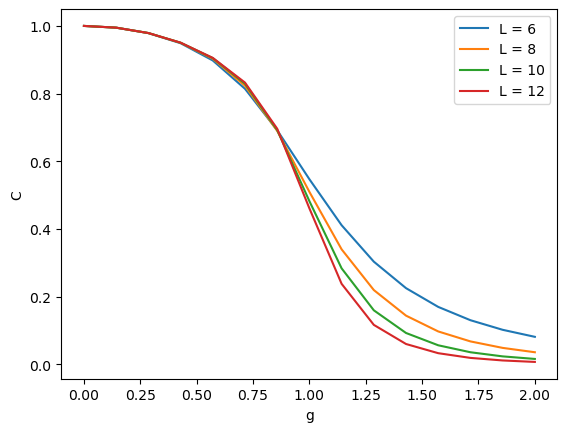

In [65]:
for i in range(4):
    L = i*2+6
    plt.plot(g, C[i], label = f"L = {L}")

plt.legend()
plt.xlabel("g")
plt.ylabel("C")
plt.show()

### Part g

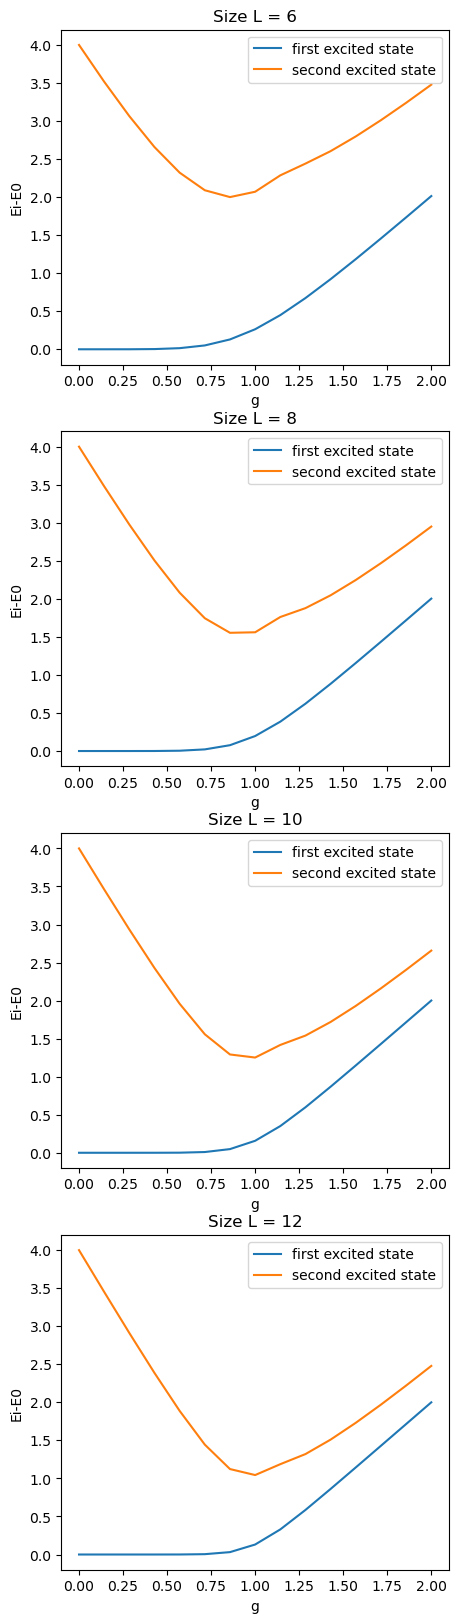

In [66]:
fig, axes = plt.subplots(4,1, figsize = (5,20))


for i in range(4):
    L = i*2+6
    axes[i].plot(g, np.array(eigvalues_first[i])- np.array(eigvalues_ground[i]), label = "first excited state")
    axes[i].plot(g, np.array(eigvalues_second[i])- np.array(eigvalues_ground[i]), label = "second excited state")
    axes[i].legend()
    axes[i].set_xlabel("g")
    axes[i].set_ylabel("Ei-E0")
    axes[i].set_title(f"Size L = {L}")

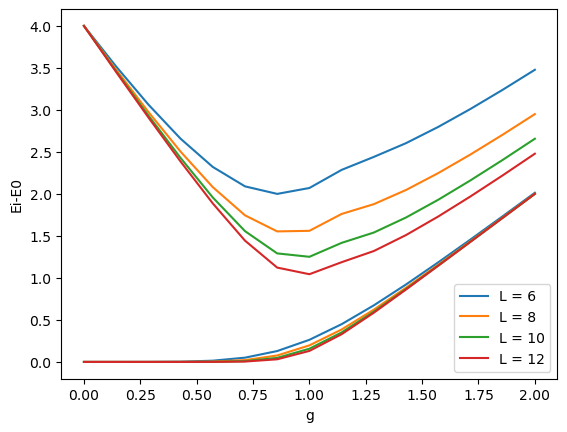

In [67]:
color = []

for i in range(4):
    L = i*2+6
    line, = plt.plot(g, np.array(eigvalues_second[i])- np.array(eigvalues_ground[i]), label = f"L = {L}")
    color.append(line.get_color())
    plt.plot(g, np.array(eigvalues_first[i])- np.array(eigvalues_ground[i]), label = '_nolegend_', color = color[i])
plt.legend()
plt.xlabel("g")
plt.ylabel("Ei-E0")
plt.title("")
plt.show()

